In [1]:
import numpy as np
import nltk
nltk.download('punkt')
import pandas as pd
import json
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gpaul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
jstring=[]
f = open('Electronics_5.json','r')
s = f.readline()

sentenceCount = 6000

for i in range(0, sentenceCount):
  jstring.append(json.loads(s)["reviewText"])
  s = f.readline()

len(jstring)

6000

In [3]:
text = jstring
text

['We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'I\'m a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connec

In [4]:
sentences = []
for i in text:
	sentences.append(nltk.tokenize.sent_tokenize(i))
# len(sentences)
sentences
# sentenceList = []
# for i in text:
# 	for j in i:
# 		sentenceCount


[['We got this GPS for my husband who is an (OTR) over the road trucker.',
  'Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.',
  'Worked great when it worked!',
  'Will work great for the normal person as well but does have the "trucker" option.',
  '(the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.',
  "Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.",
  'I contacted the seller and within minutes of my email I received a email back with instructions for an exchange!',
  'VERY impressed all the way around!'],
 ["I'm a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.",
  'Rand McNally, are you listening?First thing

In [5]:
sansPuncText = []
punctuations='''!()-[]{};:'"\,<>./?@#$%^&*_~+='''
# punctuations = "."
# print(punc)
for para in sentences:
	for sentence in para:
		newSent = sentence
		for punc in punctuations:
			newSent = newSent.replace(punc, "")
		sansPuncText.append(newSent)
sentences = sansPuncText

In [6]:
# print(sentences)
tokens = []
for i in sentences:
	# for j in i:
		tokens.append(nltk.tokenize.word_tokenize(i))
tokens
# toks = []
# for i in tokens:
# 	for j in i:
# 		toks.append(j.upper())
# len(toks)
# toks

[['We',
  'got',
  'this',
  'GPS',
  'for',
  'my',
  'husband',
  'who',
  'is',
  'an',
  'OTR',
  'over',
  'the',
  'road',
  'trucker'],
 ['Very',
  'Impressed',
  'with',
  'the',
  'shipping',
  'time',
  'it',
  'arrived',
  'a',
  'few',
  'days',
  'earlier',
  'than',
  'expected',
  'within',
  'a',
  'week',
  'of',
  'use',
  'however',
  'it',
  'started',
  'freezing',
  'up',
  'could',
  'of',
  'just',
  'been',
  'a',
  'glitch',
  'in',
  'that',
  'unit'],
 ['Worked', 'great', 'when', 'it', 'worked'],
 ['Will',
  'work',
  'great',
  'for',
  'the',
  'normal',
  'person',
  'as',
  'well',
  'but',
  'does',
  'have',
  'the',
  'trucker',
  'option'],
 ['the',
  'big',
  'truck',
  'routes',
  'tells',
  'you',
  'when',
  'a',
  'scale',
  'is',
  'coming',
  'up',
  'ect',
  'Love',
  'the',
  'bigger',
  'screen',
  'the',
  'ease',
  'of',
  'use',
  'the',
  'ease',
  'of',
  'putting',
  'addresses',
  'into',
  'memory'],
 ['Nothing',
  'really',
  'bad'

In [35]:
wordlistf = open("wordlistf.pkl", "wb")
vocabf = open("vocabf.pkl", "wb")

vocab = {}
wordlist = []
for i in range(len(tokens)):
	for j in range(len(tokens[i])):
		tokens[i][j] = tokens[i][j].upper()
		if tokens[i][j] not in vocab.keys():
			vocab[tokens[i][j]] = len(wordlist)
			wordlist.append(tokens[i][j])
# tokens
# vocab
len(wordlist)

28413

In [36]:
len(vocab)
# np.iinfo('uint16').max


28413

In [37]:
pickle.dump(wordlist, wordlistf)
pickle.dump(vocab, vocabf)

In [9]:
windowSize = 3

coOccMatrix = np.zeros((len(vocab), len(vocab)), np.uint16)
for sentence in tokens:
	for i in range(len(sentence)):
		for j in range(windowSize):
			if i-1-j > 0:
				coOccMatrix[vocab[sentence[i]]][vocab[sentence[(i-1-j)]]] += 1
			if i+1+j < len(sentence):
				coOccMatrix[vocab[sentence[i]]][vocab[sentence[(i+1+j)]]] += 1

print(coOccMatrix)
print(coOccMatrix.shape)

[[ 6 17 27 ...  0  0  0]
 [10  6 86 ...  0  0  0]
 [13 76 64 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  1  0  1]
 [ 0  0  0 ...  0  1  0]]
(28413, 28413)


In [10]:
df=pd.DataFrame(coOccMatrix,index=vocab,columns=vocab)
df

,WE,GOT,THIS,GPS,FOR,MY,HUSBAND,WHO,IS,AN,...,DUOBUT,DYMO,360D,LISTON,PRIMING,ULTRACRISP,NYLON,OBJECTSOVERALL,LABELSMADE,BELGIUM
WE,6,17,27,2,34,6,0,0,13,7,...,0,0,0,0,0,0,0,0,0,0
GOT,10,6,86,1,61,69,0,2,11,12,...,0,0,0,0,0,0,0,0,0,0
THIS,13,76,64,7,653,295,1,18,1613,110,...,0,0,0,1,0,0,0,0,0,0
GPS,1,1,7,0,14,16,1,0,6,3,...,0,0,0,0,0,0,0,0,0,0
FOR,28,50,636,14,239,826,10,93,582,240,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ULTRACRISP,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
NYLON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OBJECTSOVERALL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
LABELSMADE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [12]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4)
# redCoc = np.zeros((len(vocab), len(vocab)), np.uint16)
redCoc = svd.fit_transform(df.values)
redCoc


array([[ 1.91472982e+02, -3.62807560e+01,  5.28949628e+01,
         6.60575795e+01],
       [ 3.47943452e+02, -4.92573539e+01,  5.04292517e+01,
        -1.05946172e+02],
       [ 2.59866623e+03,  5.13086531e+02,  1.63120002e+01,
        -3.85726881e+02],
       ...,
       [ 3.32821981e-01,  2.66342006e-01, -8.81777962e-02,
         1.04920200e-01],
       [ 1.51810947e-01,  1.50128092e-01, -6.57037366e-02,
         1.33679409e-02],
       [ 1.51636888e-01,  1.50129006e-01, -6.59492970e-02,
         1.32045641e-02]])

In [15]:
np.save("RedCocf", redCoc)

In [16]:
redCoc.shape

(28413, 4)

In [17]:
from sklearn.manifold import TSNE
Y = TSNE().fit_transform(redCoc)
Y

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 37.81933  , -65.274704 ],
       [ 43.85286  , -64.29742  ],
       [ 51.570076 , -62.01873  ],
       ...,
       [-27.40119  ,  68.84921  ],
       [  2.6802757,  81.79611  ],
       [  2.6794395,  81.80599  ]], dtype=float32)

In [18]:
np.save("Yf", Y)

In [19]:
# Y[0]
print(Y[:,0],Y[:,1])

[ 37.81933    43.85286    51.570076  ... -27.40119     2.6802757
   2.6794395] [-65.274704 -64.29742  -62.01873  ...  68.84921   81.79611   81.80599 ]


In [20]:
def distanceBetween(w1, w2):
	return abs((Y[vocab[w1]][0] - Y[vocab[w2]][0])**2 + (Y[vocab[w1]][1] - Y[vocab[w2]][1])**2)

def closestNWords(N, word):
	distances = []
	for i in range(len(wordlist)):
		distances.append((distanceBetween(wordlist[i], word), wordlist[i]))
	distances.sort()
	return distances[0:N]
		

In [21]:
analysisWords = ["WE", "GPS", "GOT", "IS", "DECENT", "CAMERA"]
# analysisWords = ["WE", "GOT"]


In [22]:
for word in analysisWords:
	print(word)
	for dw in closestNWords(11, word):
		print(dw[0], end = ' - ')
		print(dw[1])

WE
0.0 - WE
0.02808731544064358 - DOESNT
0.4354076835443266 - YOURE
0.47259596694493666 - WHO
0.6148293300066143 - HAVING
0.7527228270337218 - TRIED
1.0375943139224546 - FEEL
1.0615183761256048 - PURCHASE
1.3634126995020779 - LAST
1.626645766722504 - BIG
1.9866572463070042 - COMES
GPS
0.0 - GPS
0.042396835343424755 - FEELS
0.09417739317814267 - DESKTOP
0.09912076660202729 - STAND
0.10072493073312216 - TEST
0.21108162829477806 - MODEM
1.0158061495976654 - SHOW
1.0546112800511764 - ZIP
1.0571058416971937 - BUCKS
1.3271839097724296 - MOVIE
1.3901376031899417 - BROKE
GOT
0.0 - GOT
0.09146088322449941 - MAKE
0.12605003139469773 - DID
0.18408838455798104 - COULD
0.19348812580574304 - LONG
0.22885372379096225 - BEEN
0.30953044269699603 - NICE
0.4707648321345914 - SAY
0.5442580955568701 - FOUND
0.5777254563872702 - IM
0.6153063671808923 - TOO
IS
0.0 - IS
0.01466429399442859 - OF
0.017343794883345254 - FOR
0.043062852491857484 - IN
0.04866144867264666 - I
0.04877336476056371 - IT
0.050208007232

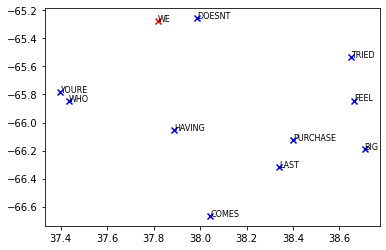

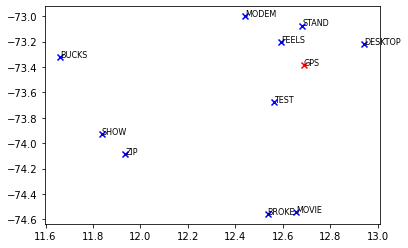

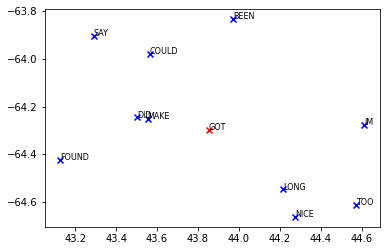

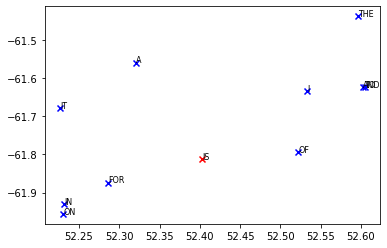

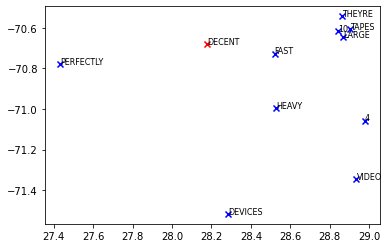

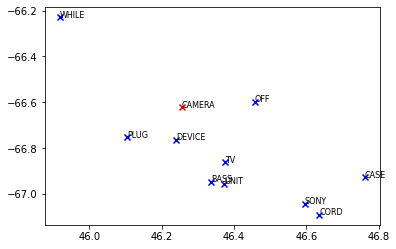

In [23]:

import matplotlib.pyplot as plot
for word in analysisWords:
	for dw in closestNWords(11, word):
		i = vocab[dw[1]]
		x = Y[i][0]
		y = Y[i][1]
		if(dw[0] == 0):
			plot.scatter(x,y, marker='x', color='red')
		else:
			plot.scatter(x,y, marker='x', color='blue')
		plot.text(x, y, dw[1], fontsize=8)
	plot.show()